In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


In [2]:
data = pd.read_csv('/content/50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.shape

(50, 5)

In [6]:
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [27]:
data= data.rename(columns= {'R&D_Spend':'RnD_Spend'})

#Correlation

In [28]:
data.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#Scatterplot between variable along with Histograms

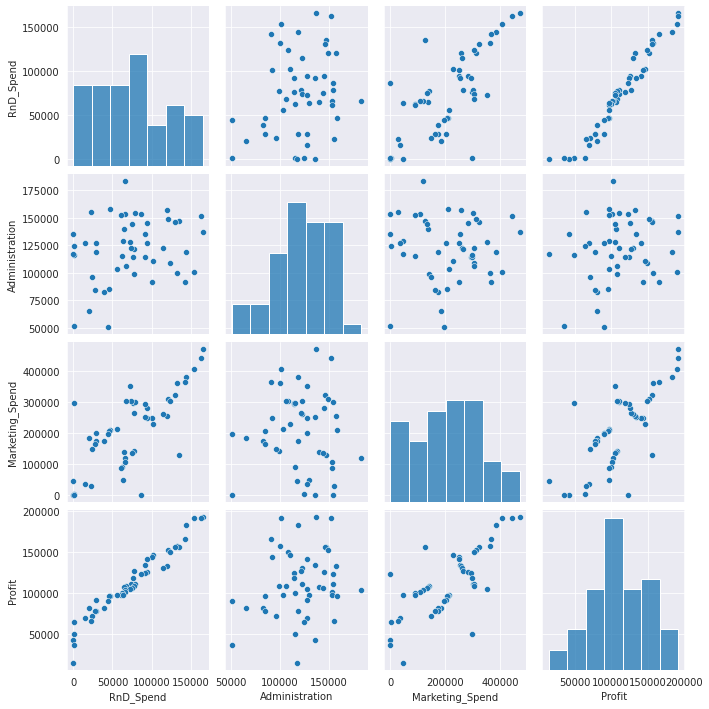

In [29]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

#Prepare a model

In [30]:
data.columns

Index(['RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [35]:
#build model
import statsmodels.formula.api as smf
model = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend+C(State)', data=data).fit()

In [36]:
#Coefficients
model.params

Intercept               50125.343832
C(State)[T.Florida]       198.788793
C(State)[T.New York]      -41.887019
RnD_Spend                   0.806023
Administration             -0.027004
Marketing_Spend             0.026980
dtype: float64

In [37]:
#tvalues and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept                7.280560
C(State)[T.Florida]      0.058970
C(State)[T.New York]    -0.012864
RnD_Spend               17.368580
Administration          -0.517012
Marketing_Spend          1.573889
dtype: float64 
 Intercept               4.444178e-09
C(State)[T.Florida]     9.532429e-01
C(State)[T.New York]    9.897941e-01
RnD_Spend               2.578772e-21
Administration          6.077373e-01
Marketing_Spend         1.226769e-01
dtype: float64


p=Value of all the variables are less than (0.05), Simple Linear Regression step is not requared

In [39]:
#R Square Valus
(model.rsquared, model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

#Residual Analysis

####Normality of Residuals (Q-Q plot)

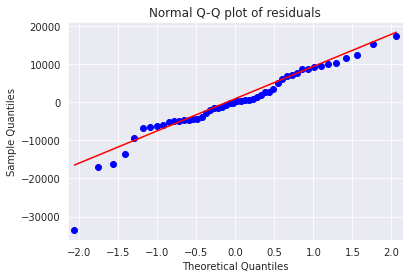

In [40]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [42]:
list(np.where(model.resid < -30000))

[array([49])]

#Residual Plot for Homoscedasticity

In [43]:
def get_standardize_values( vals ):
    return(vals - vals.mean())/vals.std()

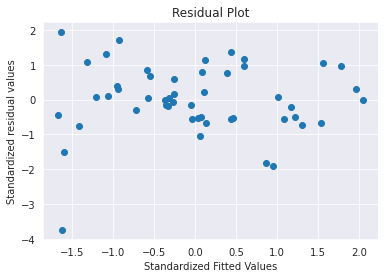

In [44]:
plt.scatter(get_standardize_values(model.fittedvalues),
            get_standardize_values(model.resid))

plt.title("Residual Plot")
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized residual values')
plt.show()

There is no pattern in the Residual plot, it is considered to be a good model equation

#Residual Vs Regressors

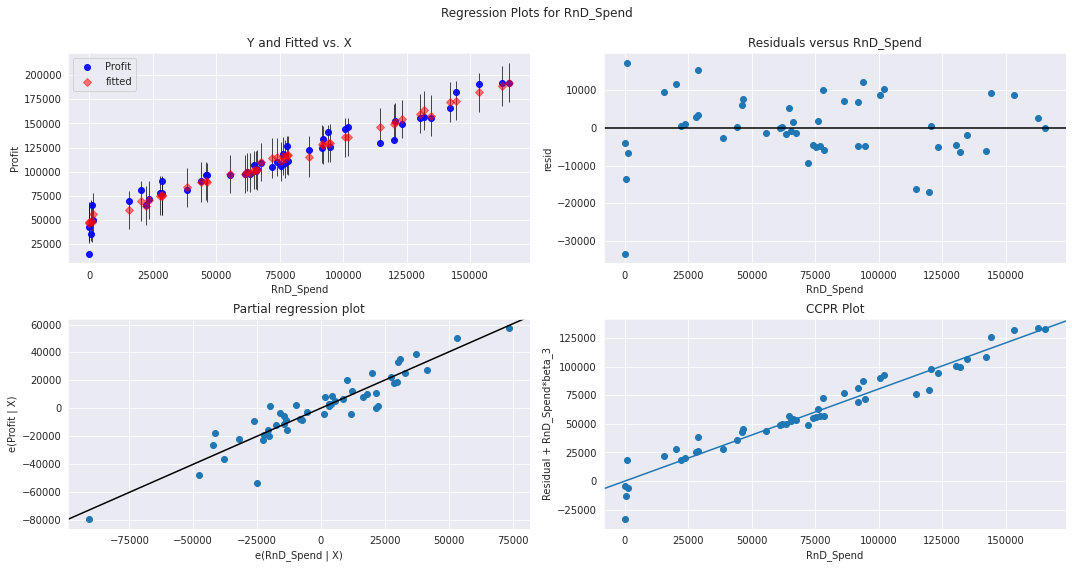

In [45]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "RnD_Spend", fig=fig)
plt.show()

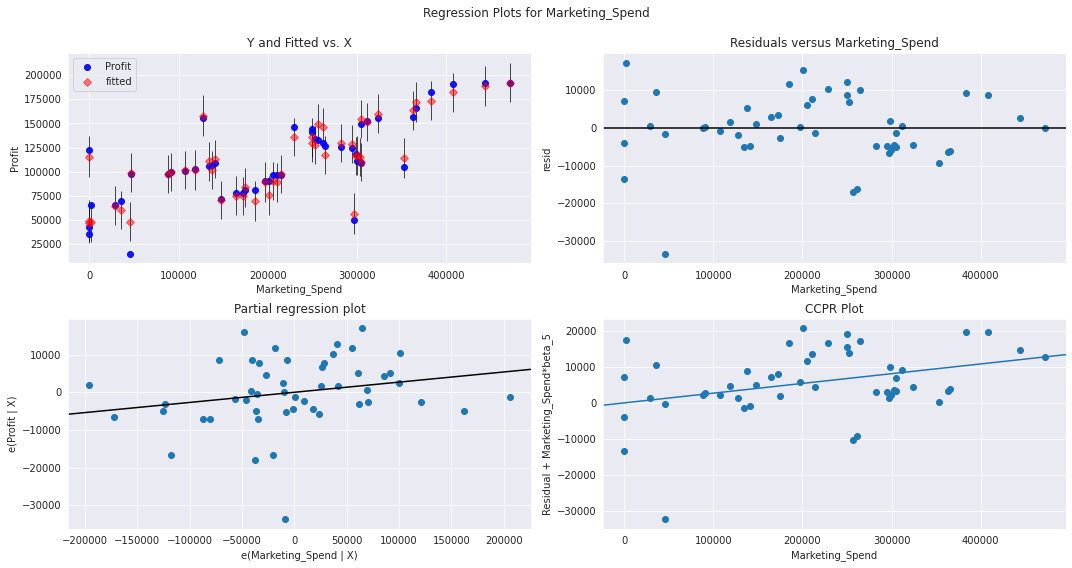

In [46]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

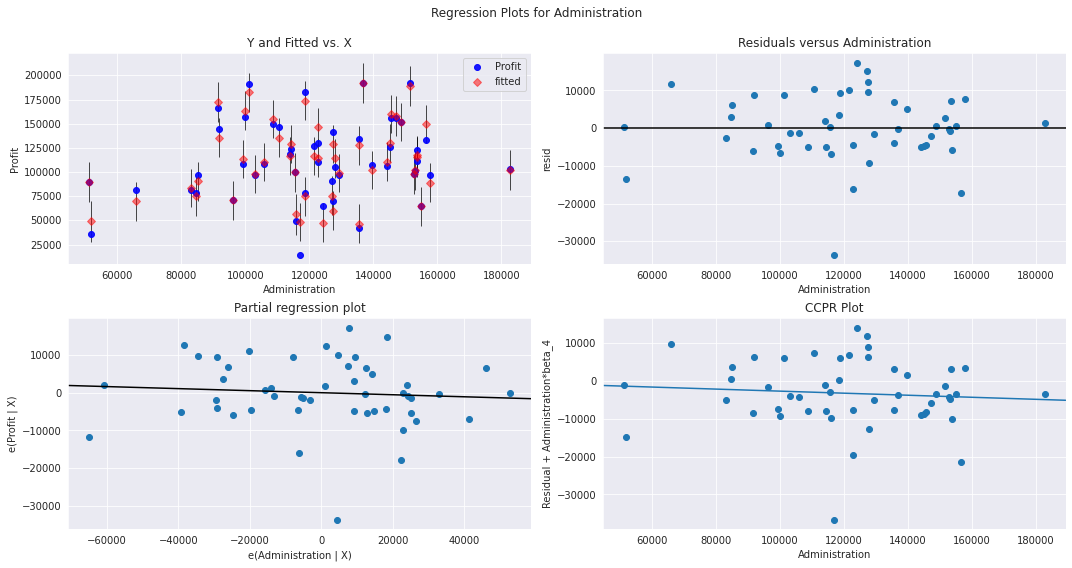

In [47]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

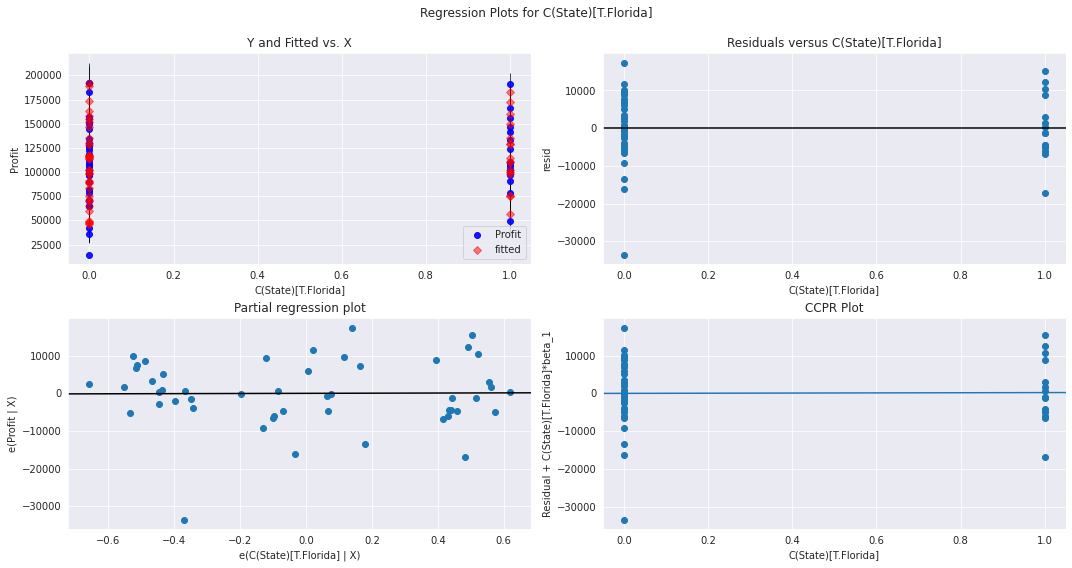

In [50]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "C(State)[T.Florida]", fig=fig)
plt.show()

As the CCPR graph indicates 0, there is no correlation between the state[T.Florida] and price

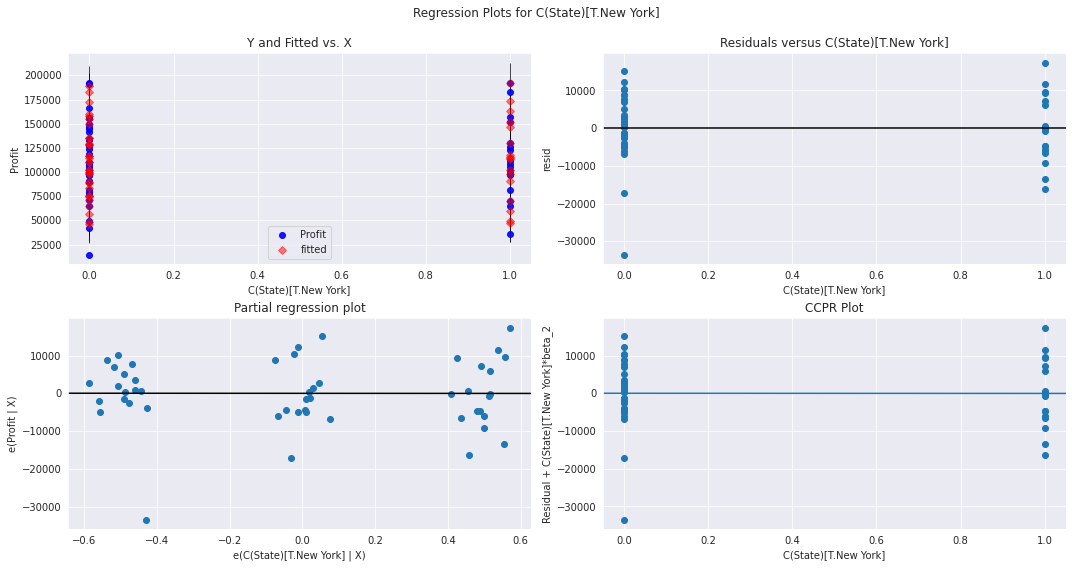

In [51]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "C(State)[T.New York]", fig=fig)
plt.show()

As the CCPR graph indicates 0, there is no correlation between the state[T.New York] and price

#Model Deletion Dignostics

Detecting influencers/outliers

#Cook's Distance

In [52]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


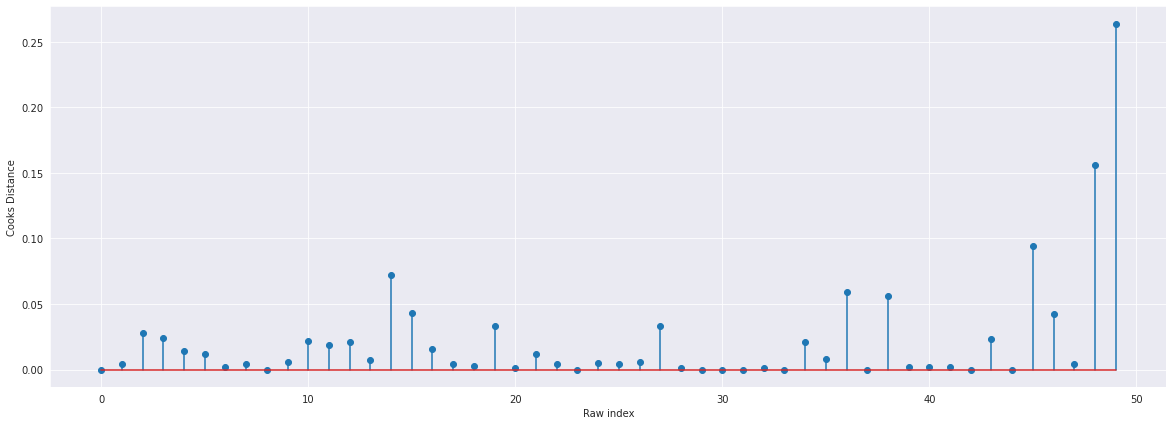

In [53]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
#Index and values of influencer
(np.argmax(c), np.max(c))

(49, 0.2639594358699432)

#High Indluence Point

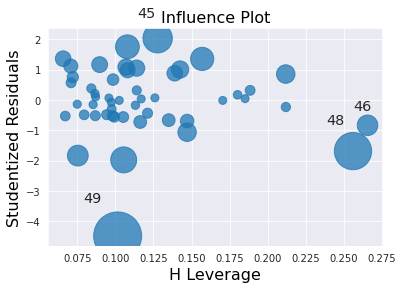

In [56]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [57]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [58]:
leverage_cutoff

0.36

In [81]:
final_ml = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend+C(State)', data=data1).fit()

In [82]:
(final_ml.rsquared, final_ml.aic)

(0.9618082858227786, 1023.9380387909305)

###Checking if there is any improvement in the rsquare and aic if we delete State variable

In [85]:
data2= data1.copy()

In [88]:
data2 = data2.drop('State', axis=1)

In [90]:
data2.head()

,RnD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [91]:
final_ml1 = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend', data=data2).fit()

In [92]:
(final_ml1.rsquared, final_ml1.aic)

(0.9613162435129847, 1020.5652974526367)

after deleting the State column , there was a slight fall in Rsquare but the AIC value has decreased with a big value.
Hence we would build the model without State as there is no significant change in the RSquare

###As the value of the data point 49 is less than 1, we can stop the diagnostic process and finalize the model

#Predicting fot new data

In [104]:
#New data for prediction
new_data = pd.DataFrame({'RnD_Spend':150000, "Administration": 100000, "Marketing_Spend":900000}, index=[1])

In [105]:
new_data

,RnD_Spend,Administration,Marketing_Spend
1,150000,100000,900000


In [106]:
final_ml1.predict(new_data)

1    190322.845555
dtype: float64

#Result : Profit for the given data set would be 190322.845555
#With the Rsquare value as 0.961